# Proyek Analisis Data: Nama dataset
- Nama: William Kester Hermawan
- Email: wkhermawan@gmail.com
- Id Dicoding: willkest

## Menentukan Pertanyaan Bisnis

- Bagaimana tren PM2.5 rata-rata semua stasiun dari tahun 2013 sampai 2017?
- Berapa selisih peningkatan CO pada stasiun Aotizhongxin setiap bulannya pada tahun 2016?
- Stasiun manakah yang memiliki kualitas udara terburuk dan "terbaik" pada tahun 2016?
- Bagaimana forecast PM2.5 untuk 7 hari kedepan?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st
import os
import numpy as np

## Data Wrangling

### Gathering Data

Combine all station data

In [2]:
dataframes = []
csv_dir = "C:\\Users\\willi\\Documents\\William\\Programming Tests\\Python test\\Dicoding Data Analisis\\Air-quality-dataset\\PRSA_Data_20130301-20170228"
csv_files = os.listdir(csv_dir)
for file in csv_files:
    df = pd.read_csv("{}\\{}".format(csv_dir, file))
    dataframes.append(df)

dataframes

[          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
 0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
 1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
 2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
 3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
 4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
 ...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
 35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
 35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
 35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
 35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
 35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   
 
        TEMP    PRES  DEWP  RAIN   wd  WSPM       

Save combined dataframe to a csv file

In [3]:
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv("all_air_data.csv", index=False)

In [4]:
all_df = pd.read_csv("all_air_data.csv")

### Assessing Data

Get information about the data

In [5]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [7]:
all_df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [8]:
all_df.duplicated().sum()

0

### Cleaning Data

Fill some of the missing values using fillna() with each column's median values

In [9]:
all_df["PM2.5"].fillna(all_df["PM2.5"].median(), inplace=True)
all_df["PM10"].fillna(all_df["PM10"].median(), inplace=True)
all_df["SO2"].fillna(all_df["SO2"].median(), inplace=True)
all_df["NO2"].fillna(all_df["NO2"].median(), inplace=True)
all_df["CO"].fillna(all_df["CO"].median(), inplace=True)
all_df["O3"].fillna(all_df["O3"].median(), inplace=True)
all_df["TEMP"].fillna(all_df["TEMP"].median(), inplace=True)

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Drop unused columns which have null values

In [11]:
all_df.dropna(axis=1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,Wanshouxigong


In [30]:
all_df.to_csv("all_air_data_final.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore
- Bagaimana tren PM2.5 rata-rata semua stasiun dari tahun 2013 sampai 2017?
- Berapa selisih peningkatan CO pada stasiun Aotizhongxin setiap bulannya pada tahun 2016?
- Stasiun manakah yang memiliki kualitas udara terburuk dan "terbaik" pada tahun 2016?
- Bagaimana forecast PM2.5 untuk 7 hari kedepan?

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

In [12]:
pm25_yearly_avg_df = all_df.groupby(by="year").agg({
    "PM2.5": "mean"
}).reset_index()

pm25_yearly_avg_df.head()

,year,PM2.5
0,2013,79.690762
1,2014,84.743827
2,2015,79.128489
3,2016,71.567642
4,2017,92.090631


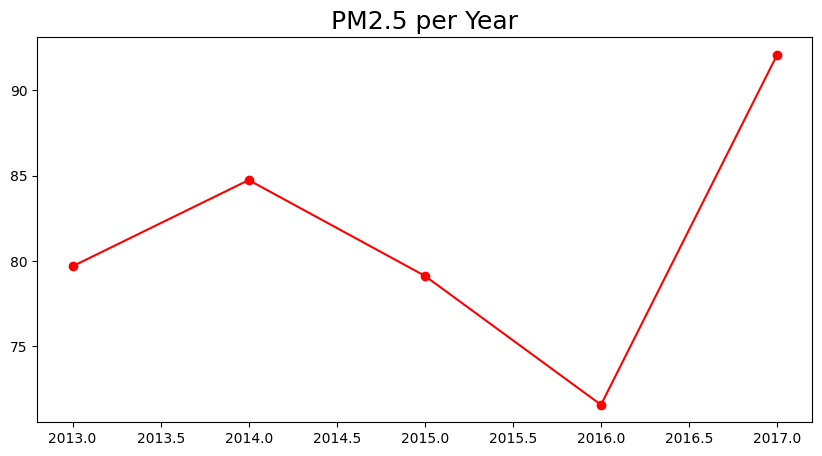

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(pm25_yearly_avg_df["year"], pm25_yearly_avg_df["PM2.5"], color="red", marker="o")
plt.title("PM2.5 per Year", size=18)
plt.show()

### Pertanyaan 2: 

In [14]:
monthly_co_df = all_df[(all_df["year"] >= 2015) & (all_df["year"] < 2017)].groupby(by=["year", "month"]).agg({
    "CO": "mean"
}).reset_index()

monthly_co_df.head(30)

,year,month,CO
0,2015,1,1898.566308
1,2015,2,1452.269345
2,2015,3,1185.013441
3,2015,4,760.335648
4,2015,5,723.387097
5,2015,6,1051.793981
6,2015,7,815.322581
7,2015,8,778.942652
8,2015,9,806.400463
9,2015,10,945.396505


Calculate the difference for each element in the 'CO' column with its preceding element.

In [15]:
delta = []
range_co = len(monthly_co_df["CO"])
for i in range(range_co):
    if not((i == range_co) or (i == 0)):
        diff = monthly_co_df["CO"][i] - monthly_co_df["CO"][i-1]
        delta.append(diff)

Remove the first row because it does not contain delta values.

In [16]:
monthly_co_df = monthly_co_df.iloc[1:]
monthly_co_df.head()

,year,month,CO
1,2015,2,1452.269345
2,2015,3,1185.013441
3,2015,4,760.335648
4,2015,5,723.387097
5,2015,6,1051.793981


Filter data that are in 2016

In [17]:
monthly_co_df["delta_CO"] = delta
monthly_co_df = monthly_co_df[monthly_co_df["year"] == 2016]

In [18]:
monthly_co_df.head(12)

,year,month,CO,delta_CO
12,2016,1,1558.221326,-1143.940412
13,2016,2,884.470785,-673.750541
14,2016,3,1203.505824,319.035039
15,2016,4,780.162037,-423.343787
16,2016,5,661.323925,-118.838112
17,2016,6,744.675926,83.352001
18,2016,7,891.028226,146.352300
19,2016,8,816.700269,-74.327957
20,2016,9,762.141204,-54.559065
21,2016,10,1124.787186,362.645983


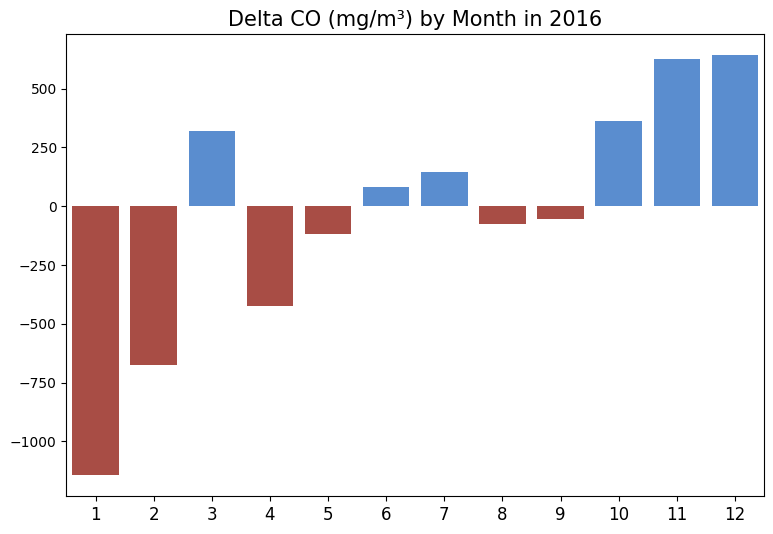

In [19]:
plt.figure(figsize=(9, 6))
color = ["#b83f35", "#b83f35", "#468ae3", "#b83f35", "#b83f35", "#468ae3", "#468ae3", "#b83f35", "#b83f35", "#468ae3", "#468ae3", "#468ae3",]
sns.barplot(
    x="month",
    y="delta_CO",
    data=monthly_co_df,
    palette=color
)
plt.title("Delta CO (mg/m³) by Month in 2016", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:

Get each station's air indicators by year 2016

In [20]:
station_df = all_df[all_df["year"] == 2016].groupby(by=["station", "year"]).agg({
    "CO": "mean",
    "PM2.5": "mean",
    "PM10": "mean"
}).reset_index()

station_df.head()

,station,year,CO,PM2.5,PM10
0,Aotizhongxin,2016,1191.199909,73.719376,94.488160
1,Changping,2016,1119.740437,61.569558,86.284153
2,Dingling,2016,874.294171,59.659381,80.477345
3,Dongsi,2016,1227.459016,79.212204,102.314549
4,Guanyuan,2016,1167.258652,76.783356,104.403575


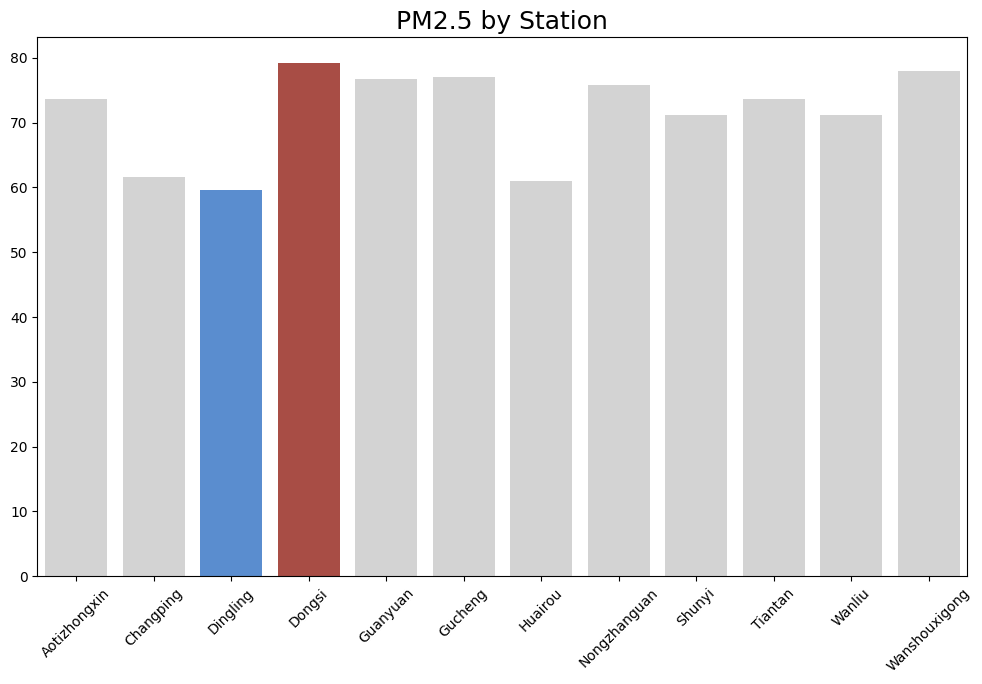

In [21]:
plt.figure(figsize=(12, 7))
color = ["lightgrey", "lightgrey", "#468ae3", "#b83f35", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]
sns.barplot(
    data=station_df,
    x="station",
    y="PM2.5",
    palette=color
)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45)
plt.title("PM2.5 by Station", size=18)
plt.show()

### Pertanyaan 4

#### Penjelasan Metode Analisis Moving Average
Untuk pertanyaan 4 digunakan metode moving average untuk forecasting nilai 7 hari kedepan. Langkah yang dilakukan adalah dengan merata-rata nilai dari indikator PM2.5 selama lima hari kebelakang untuk mendapatkan forecast nilai masa depan. Untuk forecastingnya, langkah tersebut akan dilooping selama periode forecasting dan menambahkan hasil moving average ke nilai PM2.5 untuk nilai forecast selanjutnya. Moving average forecasting ini lebih cocok digunakan untuk melihat future tren dari hasil forecasting bukan untuk mendapatkan nilai "eksak".

In [22]:
daily_pm25_df = all_df.groupby(by=["year", "day"]).agg({
    "PM2.5": "mean"
}).reset_index()

daily_pm25_df.head(12)

,year,day,PM2.5
0,2013,1,78.285069
1,2013,2,86.946181
2,2013,3,71.531250
3,2013,4,73.024306
4,2013,5,102.542361
5,2013,6,123.056944
6,2013,7,114.779514
7,2013,8,108.482986
8,2013,9,59.380556
9,2013,10,41.229861


In [23]:
window_size = 5
daily_pm25_df['MovingAverage'] = daily_pm25_df['PM2.5'].rolling(window=window_size).mean()
daily_pm25_df.head(10)

,year,day,PM2.5,MovingAverage
0,2013,1,78.285069,NaN
1,2013,2,86.946181,NaN
2,2013,3,71.531250,NaN
3,2013,4,73.024306,NaN
4,2013,5,102.542361,82.465833
5,2013,6,123.056944,91.420208
6,2013,7,114.779514,96.986875
7,2013,8,108.482986,104.377222
8,2013,9,59.380556,101.648472
9,2013,10,41.229861,89.385972


Drop null rows

In [24]:
daily_pm25_df = daily_pm25_df.dropna(axis=0)
daily_pm25_df.head()

,year,day,PM2.5,MovingAverage
4,2013,5,102.542361,82.465833
5,2013,6,123.056944,91.420208
6,2013,7,114.779514,96.986875
7,2013,8,108.482986,104.377222
8,2013,9,59.380556,101.648472


Add time step for plotting

In [25]:
time_step = [i+1 for i in range(len(daily_pm25_df))]
daily_pm25_df["day"] = time_step

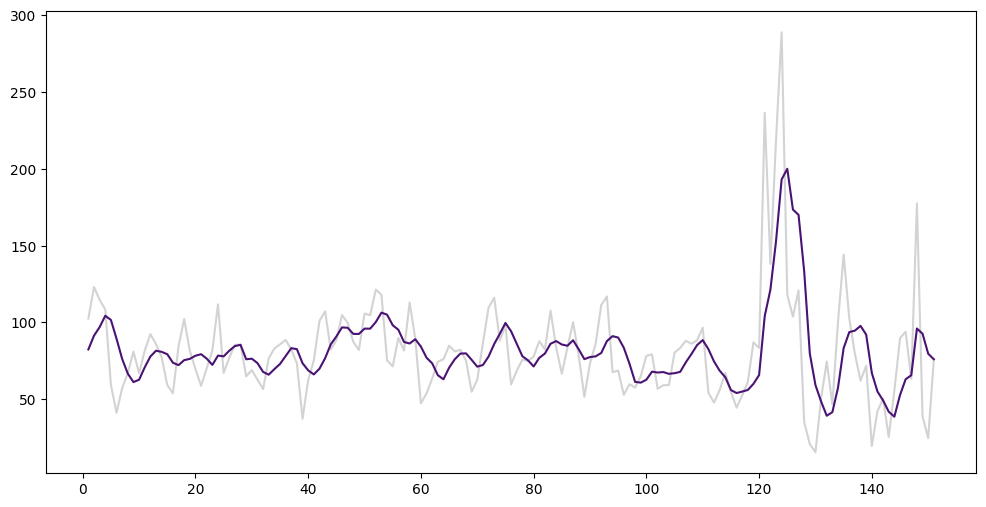

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(daily_pm25_df["day"], daily_pm25_df["PM2.5"], color="lightgrey", label="Original Data")
plt.plot(daily_pm25_df["day"], daily_pm25_df["MovingAverage"], color="#491273", label="Moving Average")
plt.show()

Forecast the next 7 days values

In [27]:
forecast_period = 7
for i in range(forecast_period):
    last_ma = daily_pm25_df["MovingAverage"].iloc[-5].mean()
    next_day = daily_pm25_df["day"].iloc[-1] + 1
    last_year = 2017

    # add next data to the dataframe
    daily_pm25_df = daily_pm25_df.append({
        "year": last_year,
        "day": next_day,
        "PM2.5": last_ma,
        "MovingAverage": last_ma,
    }, ignore_index=True)

C:\Users\willi\AppData\Local\Temp\ipykernel_33112\46795437.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_pm25_df = daily_pm25_df.append({
C:\Users\willi\AppData\Local\Temp\ipykernel_33112\46795437.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_pm25_df = daily_pm25_df.append({
C:\Users\willi\AppData\Local\Temp\ipykernel_33112\46795437.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_pm25_df = daily_pm25_df.append({
C:\Users\willi\AppData\Local\Temp\ipykernel_33112\46795437.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  daily_pm25_df = daily_pm25_df.append({
C:\Users\willi\AppData\Local\Temp\ipykernel_

In [28]:
daily_pm25_df.tail(10)

,year,day,PM2.5,MovingAverage
148,2017.0,149.0,38.791667,92.683681
149,2017.0,150.0,24.770833,79.678125
150,2017.0,151.0,75.881944,76.063889
151,2017.0,152.0,65.654514,65.654514
152,2017.0,153.0,96.060417,96.060417
153,2017.0,154.0,92.683681,92.683681
154,2017.0,155.0,79.678125,79.678125
155,2017.0,156.0,76.063889,76.063889
156,2017.0,157.0,65.654514,65.654514
157,2017.0,158.0,96.060417,96.060417


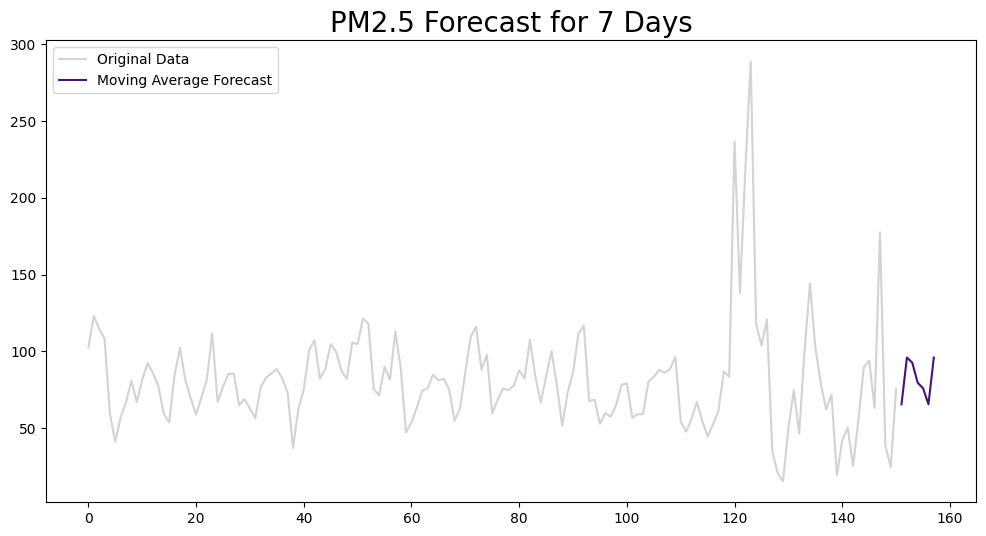

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(daily_pm25_df)-forecast_period), daily_pm25_df["PM2.5"].iloc[:-forecast_period], color="lightgrey", label="Original Data")
plt.plot(np.arange(len(daily_pm25_df)-forecast_period, len(daily_pm25_df)), daily_pm25_df["PM2.5"].iloc[-forecast_period:], color="#491273", label="Moving Average Forecast")
plt.title("PM2.5 Forecast for {} Days".format(forecast_period), size=20)
plt.legend()
plt.show()

## Conclusion

- Terjadi penurunan nilai indikator PM2.5 yang cukup signifikan yang dimulai dari 2014 sampai 2016, kemudian terjadi kenaikan yang drastis pada tahun 2017
- Pada tahun 2016, selisih indikator CO menandakan tren naik mulai dari awal tahun. Dari awalnya selisih negatif menjadi positif menjelang masuk tahun 2017, hal ini menunjukkan adanya korelasi indikator PM2.5 dengan CO
- Pada tahun 2016, stasiun dengan indikator PM2.5 terbaik adalah Dingling dan terburuk adalah 
- Untuk forecast 7 hari kedepan, terdapat indikasi nilai dari PM2.5 akan naik dari beberapa hari sebelumnya